In [77]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress
from scipy.optimize import curve_fit
import scipy.stats as stats
import numpy as np
import os, re, glob
import pandas as pd
from PyPDF2 import PdfReader
top = os.getcwd()
data_dir = os.path.join(top, 'data') # specify data directory here
data_2_dir = os.path.join(top, 'data_2') # specify data directory here

# Parse MS Data PDF

- Parse m/z and Abundance into individual csv files

In [78]:
def parse(path):
    """
    Parse MS data
    
    Parameters
    ----------
    path: string
        path to pdf file
    """
    reader = PdfReader(path)
    text = ''
    for page in reader.pages:
        text += page.extract_text() + "\n"
    
    if "No peaks found" in text: 
        return pd.DataFrame()

    pattern = r'\s*([0-9]+\.\d+)\s+([0-9]+\.\d+)\s*'
    match = re.findall(pattern, text)
    if not match:
        return pd.DataFrame()

    mz_values = [float(m[0]) for m in match]
    abundances = [float(m[1]) for m in match]

    df = pd.DataFrame({
        "m/z": mz_values,
        "Abundance": abundances
    })

    return df


In [79]:
caffeine = 194.08037557
caffeine_D3 = 197.09920581

df = pd.DataFrame(columns=['loc', 'trial', 'seq', 'caf/cafd3', 'ab_caf', 'mz_caf', 'ab_cafd3', 'mz_cafd3'])

for path in glob.glob(os.path.join(data_dir, '*')):
    id = os.path.basename(path)
    id, ext = os.path.splitext(id)
    msdata = os.path.join(path, f'{id}_msdata.pdf')

    df_iter = parse(msdata)
    df_iter.to_csv(os.path.join(path, 'msdata.csv'))

    row_insert = {}
    idx_caf = (df_iter["m/z"] - caffeine).abs().idxmin()
    row_insert['ab_caf'] = df_iter.loc[idx_caf, "Abundance"]
    row_insert['mz_caf'] = df_iter.loc[idx_caf, "m/z"]

    idx_cafd3 = (df_iter["m/z"] - caffeine_D3).abs().idxmin()
    row_insert['ab_cafd3'] = df_iter.loc[idx_cafd3, "Abundance"]
    row_insert['mz_cafd3'] = df_iter.loc[idx_cafd3, "m/z"]
    row_insert['caf/cafd3'] = df_iter.loc[idx_caf, "Abundance"] / df_iter.loc[idx_cafd3, "Abundance"]

    row_insert['loc'] = int(id[:3])
    row_insert['trial'] = int(id[3:5])
    row_insert['seq'] = int(id[5:])
    df.loc[id] = row_insert

for path in glob.glob(os.path.join(data_2_dir, '*')):
    id = os.path.basename(path)
    id, ext = os.path.splitext(id)
    msdata = os.path.join(path, f'{id}_msdata.pdf')

    df_iter = parse(msdata)
    df_iter.to_csv(os.path.join(path, 'msdata.csv'))

    row_insert = {}
    idx_caf = (df_iter["m/z"] - caffeine).abs().idxmin()
    row_insert['ab_caf'] = df_iter.loc[idx_caf, "Abundance"]
    row_insert['mz_caf'] = df_iter.loc[idx_caf, "m/z"]

    idx_cafd3 = (df_iter["m/z"] - caffeine_D3).abs().idxmin()
    row_insert['ab_cafd3'] = df_iter.loc[idx_cafd3, "Abundance"]
    row_insert['mz_cafd3'] = df_iter.loc[idx_cafd3, "m/z"]
    row_insert['caf/cafd3'] = df_iter.loc[idx_caf, "Abundance"] / df_iter.loc[idx_cafd3, "Abundance"]

    row_insert['loc'] = int(id[:3])
    row_insert['trial'] = int(id[3:5])
    row_insert['seq'] = int(id[5:])
    df.loc[id] = row_insert

In [80]:
df = df.sort_values(by="seq", ascending=True)
df

,loc,trial,seq,caf/cafd3,ab_caf,mz_caf,ab_cafd3,mz_cafd3
06101001,61,1,1,0.219402,2974.0,194.10,13555.0,197.10
06102002,61,2,2,0.219773,2909.8,194.10,13240.0,197.10
06103003,61,3,3,0.216756,2026.8,194.00,9350.6,197.00
06201004,62,1,4,1.509815,16651.6,194.00,11028.9,197.00
06202005,62,2,5,1.532126,13759.1,194.00,8980.4,197.00
06203006,62,3,6,1.540549,14138.7,194.00,9177.7,197.00
06301007,63,1,7,3.242893,35441.9,194.00,10929.1,197.00
06302008,63,2,8,3.119840,34491.7,194.00,11055.6,197.00
06303009,63,3,9,3.219981,34183.0,194.00,10615.9,197.00
06401010,64,1,10,4.967350,59014.6,194.00,11880.5,197.05


# Compute Mean and STD

In [81]:
cols = ['caf/cafd3']
stats = df.groupby("loc")[cols].agg(['mean', 'std'])
stats.columns = [
    f"{col[0]}_{col[1]}" if isinstance(col, tuple) else col
    for col in stats.columns
]
stats = stats.reset_index()
stats

,loc,caf/cafd3_mean,caf/cafd3_std
0,41,0.788957,0.029327
1,42,10.722276,0.211563
2,43,1.539182,0.026573
3,61,0.218644,0.001645
4,62,1.527497,0.015881
5,63,3.194238,0.065441
6,64,4.995723,0.050352
7,65,6.784358,0.045523
8,66,8.455805,0.315315
9,67,313.520825,81.635332


In [109]:
int_std_mean = np.array(df['ab_cafd3'].iloc[:17].tolist()).mean()
cawfee1 = 23846.9 / int_std_mean
cawfee2 = 27959.7 / int_std_mean
cawfee3 = 30656.8 / int_std_mean

cawfee = [cawfee1, cawfee2, cawfee3]
cawfee_mean = np.array(cawfee).mean()
cawfee_std = np.array(cawfee).std()

print(f"abundance mean: {np.array(cawfee).mean()}")
print(f"abundance std: {np.array(cawfee).std()}")

abundance mean: 2.442441769604003
abundance std: 0.24880277744574505


## Blank Row

In [82]:
blank_row = pd.DataFrame([{
    'loc': 0,
    'caf/cafd3_mean': 0,
    'caf/cafd3_std': 0  
}])

stats = pd.concat([blank_row, stats], ignore_index=True)
stats

,loc,caf/cafd3_mean,caf/cafd3_std
0,0,0.000000,0.000000
1,41,0.788957,0.029327
2,42,10.722276,0.211563
3,43,1.539182,0.026573
4,61,0.218644,0.001645
5,62,1.527497,0.015881
6,63,3.194238,0.065441
7,64,4.995723,0.050352
8,65,6.784358,0.045523
9,66,8.455805,0.315315


# Calibration Curve

In [83]:
def plot(y, c):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    df: pd.DataFrame object
        must contain a blank + 6 standard concentraions, 
        specify the rows if necessary
    """
    
    zero = y[0]
    y = [i - zero for i in y]
    print(f'y values: {y}')
    print(f'x values: {c}')

    x = np.array(c)
    y = np.array(y)

    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    x_space = np.linspace(min(x), max(x), 1000)
    y_fit = slope * x_space

    ss_res = np.sum((y - (slope * x))**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  
    r2 = 1 - (ss_res / ss_tot)
    r2_null = 1 - (ss_res / ss_tot_null)
    print(f"r2: {r2}")
    print(f"r2_null: {r2_null}")

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x, R^2 = {r2_null:.5f}')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Concentration (ppm)')
    ax.set_title(f'Standard Curve')
    ax.grid(True)
    ax.legend()
    plt.savefig('standard.png')

y values: [0.0, 0.7889565391842944, 1.5274966716661362, 3.1942379651248873, 4.995722959365522, 6.784357522722071, 8.455804978179891]
x values: [0, 50.21, 100.42, 200.84, 301.26, 401.68, 502.1]
r2: 0.9989769141141065
r2_null: 0.999599386317974


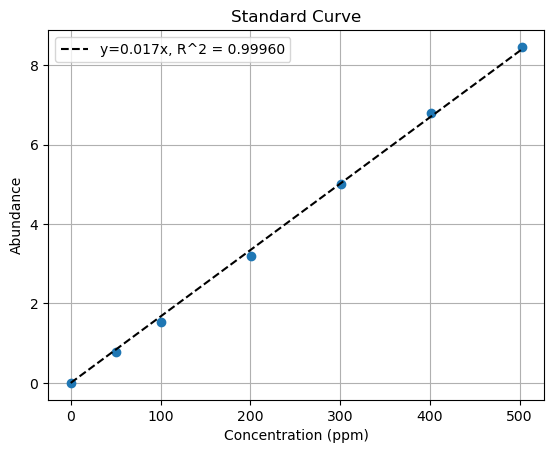

In [84]:
c = [0, 50.21, 100.42, 200.84, 301.26, 401.68, 502.1] # adjust concentrations here

indices = [0, 41, 62, 63, 64, 65, 66]
std_df = stats.set_index('loc').loc[indices].reset_index()
y = std_df['caf/cafd3_mean'].values
plot(y, c)

In [85]:
def plot_errorbar(y, c, sd):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    df: pd.DataFrame object
        must contain a blank + 6 standard concentraions, 
        specify the rows if necessary
    """
    
    zero = y[0]
    y = [i - zero for i in y]
    print(f'y values: {y}')
    print(f'x values: {c}')

    x = np.array(c)
    y = np.array(y)

    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    x_space = np.linspace(min(x), max(x), 1000)
    y_fit = slope * x_space

    ss_res = np.sum((y - (slope * x))**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  
    r2 = 1 - (ss_res / ss_tot)
    r2_null = 1 - (ss_res / ss_tot_null)
    print(f"r2: {r2}")
    print(f"r2_null: {r2_null}")

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x, R^2 = {r2_null:.5f}')
    ax.errorbar(x, y, yerr=sd, fmt='none', label='error', capsize=4, color='tab:red')
            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppb)')
    ax.set_title(f'Standard Curve')
    ax.grid(True)
    ax.legend()
    plt.savefig('standard_error.png')

y values: [0.0, 0.7889565391842944, 1.5274966716661362, 3.1942379651248873, 4.995722959365522, 6.784357522722071, 8.455804978179891]
x values: [0, 50.21, 100.42, 200.84, 301.26, 401.68, 502.1]
r2: 0.9989769141141065
r2_null: 0.999599386317974


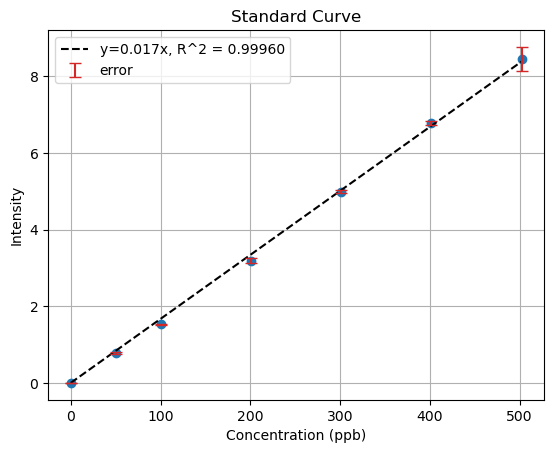

In [86]:
c = [0, 50.21, 100.42, 200.84, 301.26, 401.68, 502.1] # adjust concentrations here

indices = [0, 41, 62, 63, 64, 65, 66]
std_df = stats.set_index('loc').loc[indices].reset_index()
sd = std_df['caf/cafd3_std'].values
y = std_df['caf/cafd3_mean'].values
plot_errorbar(y, c, sd)

# Slope, Limit of Detection

In [87]:
def m_r2_lod(y, c):
    """
    Calculate slope (ms), regression value (r2s), and
    limit of detection values (lods) for each wavelenth
    
    Parameters
    ----------
    dfs: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary
    ms: list
        slope for each wavelengths
    r2s: list
        r^2 for each wavelengths
    lods: list
        limit of detection for each wavelengths
    """
    y = np.array(y)
    c = np.array(c)

    zero = y[0]
    y = y - zero
    x = c
    
    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    y_pred = slope * x

    residuals = y - y_pred
    
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  

    r2 = 1 - (ss_res / ss_tot_null)

    n = len(x)
    sigma_y = np.sqrt(ss_res / (n - 1))

    lod = 3 * sigma_y / slope

    return slope, r2, lod

In [88]:
m, r2, lod = m_r2_lod(y, c)
print(f'm: {m}')
print(f'r2: {r2}')
print(f'lod: {lod}')

m: 0.01671064330312928
r2: 0.999599386317974
lod: 18.301297722553805


In [89]:
unknown = stats['caf/cafd3_mean'].iloc[3]
unknown_std = stats['caf/cafd3_std'].iloc[3]
concentration = unknown / m
concentration *= (10 / 9)
std = unknown_std / m
print(concentration)
print(std)

102.34210411984859
1.5901702310989152


In [107]:
cawfeee = cawfee_mean / m
cawfeee_std = cawfee_std / m

In [90]:
def CI(conc, sd, n): # 95% confidence interval two tailed
    n = 3
    dof = n - 1

    se = sd / np.sqrt(n)
    t = stats.t.ppf(0.975, dof)
    ci = t * se
    print(f'concentration: {conc} ± {ci} ppm; sd: {sd} ppm')

In [108]:
import scipy.stats as stats

CI(concentration, std, 3)
CI(cawfeee, cawfeee_std, 3)

concentration: 102.34210411984859 ± 3.9502018391266005 ppm; sd: 1.5901702310989152 ppm
concentration: 146.16084643172442 ± 36.986030461065546 ppm; sd: 14.888880872656387 ppm
